In [1]:
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import numpy as np
import tqdm

pwd = Path(os.getcwd())
sys.path.append(str(pwd.parent.parent / "gym-checkers-for-thai"))

In [2]:
#import game
from checkers.agents.baselines import play_a_game, RandomPlayer
from checkers.game import Checkers
from checkers.agents import Player
from checkers.agents.alpha_beta import MinimaxPlayer, first_order_adv, material_value_adv
from functools import partial

In [3]:
# import model
from player import CNNPlayer

In [4]:
# black_agent = DNNPlayer('black')
black_agent = RandomPlayer('black')
white_agent = CNNPlayer('white')

In [5]:
result_histories = {'win_rate': []}

In [6]:
n_iter = 200
max_game_len = 100
game_per_iter = 50

looper = tqdm.tqdm(range(n_iter))
for iter in looper:
    n_wins = 0
    n_plays = 0
    for i in range(game_per_iter):
        ch = Checkers()
        winner, ply = play_a_game(ch, black_agent.next_move, white_agent.next_move, max_game_len, verbose=False)
        if winner == 'white':
            n_wins += 1
            white_agent.win()
        elif winner == 'black':
            white_agent.lose()
        else:
            white_agent.draw()
        n_plays += ply

    looper.set_postfix({'win_rate': n_wins / game_per_iter,
                        'avg_ply': n_plays / game_per_iter})
    result_histories['win_rate'].append(n_wins / game_per_iter)

    white_agent.train()

white_agent.save_model()

100%|██████████| 200/200 [12:37<00:00,  3.79s/it, win_rate=0.58, avg_ply=52.5]


In [11]:
result_histories['win_rate'] = np.array(result_histories['win_rate'])

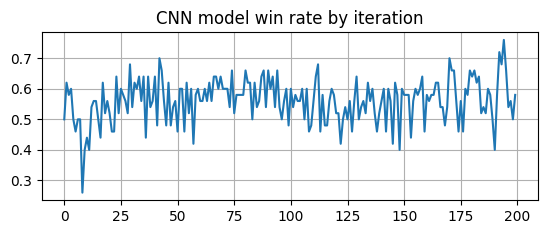

In [12]:
# bar plot and 0 mean 'lose and 1 mean 'win'
plt.subplot(2, 1, 1)
plt.title('CNN model win rate by iteration')
plt.plot(result_histories['win_rate'])
plt.grid()

In [ ]:
len(white_agent.history)

0